     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 748.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

Saving woman-5059062_960_720 (1).jpg to woman-5059062_960_720 (1).jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.2MB/s]



image 1/1 /content/woman-5059062_960_720 (1).jpg: 448x640 1 person, 4 cars, 1 dog, 335.9ms
Speed: 17.0ms preprocess, 335.9ms inference, 33.7ms postprocess per image at shape (1, 3, 448, 640)


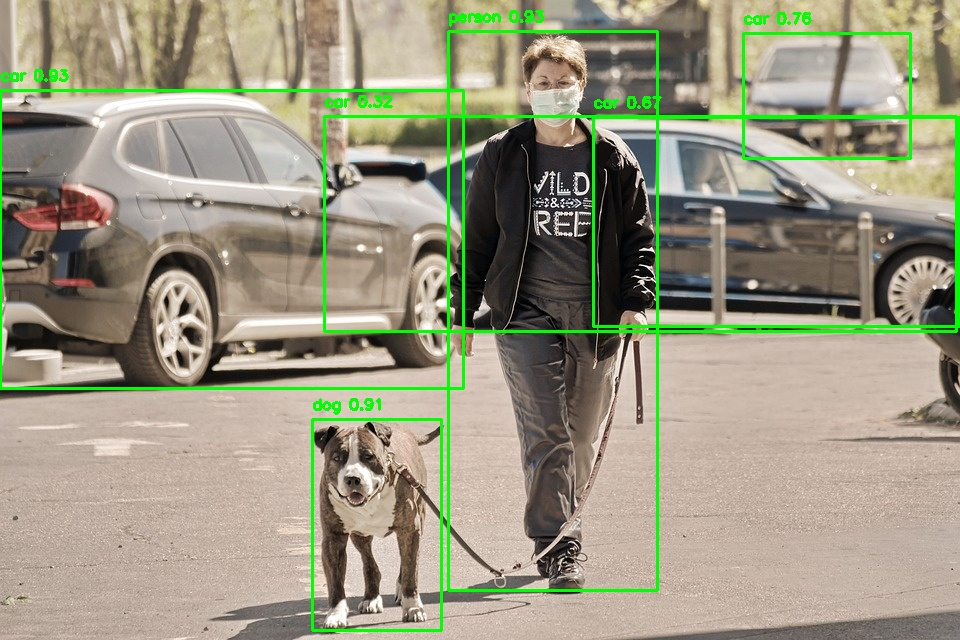

In [2]:
# Install required libraries
!pip install ultralytics

import cv2
from google.colab import files
from ultralytics import YOLO
from IPython.display import display, Image

# Upload an image
uploaded = files.upload()
image_path = next(iter(uploaded))

# Load the YOLO model
model = YOLO('yolov8n.pt')  # Load the smallest YOLOv8 model

# Perform object detection
results = model(image_path)

# Get the first result (since we're only processing one image)
result = results[0]

# Read the image
img = cv2.imread(image_path)

# Draw bounding boxes and labels on the image
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    cls = int(box.cls)
    label = f"{result.names[cls]} {conf:.2f}"

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the result
cv2.imwrite('result.jpg', img)

# Display the result
display(Image('result.jpg'))

# Print detected objects
for box in result.boxes:
    print(f"Detected: {result.names[int(box.cls)]} confidence {float(box.conf):.2f}")
